In [1]:
import pandas as pd
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
train=pd.read_csv("input/train_diam.csv")
test=pd.read_csv("input/test_diam.csv")

In [3]:
X=train.drop(columns=["price"])
y=train["price"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
reg=ExtraTreesRegressor(n_estimators=750, random_state=0)
reg.fit(X_train,y_train)

ExtraTreesRegressor(n_estimators=750, random_state=0)

In [12]:
y_pred=reg.predict(X_test)

In [13]:
np.sqrt(mse(y_pred,y_test))

554.2180603952434

In [34]:
y_pred=reg.predict(test)

In [35]:
final=pd.DataFrame({"price":y_pred})
final.index.rename("id", inplace=True)

In [37]:
final.to_csv("output/test3.csv")

**Vamos a hacer un gráfico con los datos.**

In [14]:
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt

In [15]:
b,m=polyfit(y_test,y_pred,1)

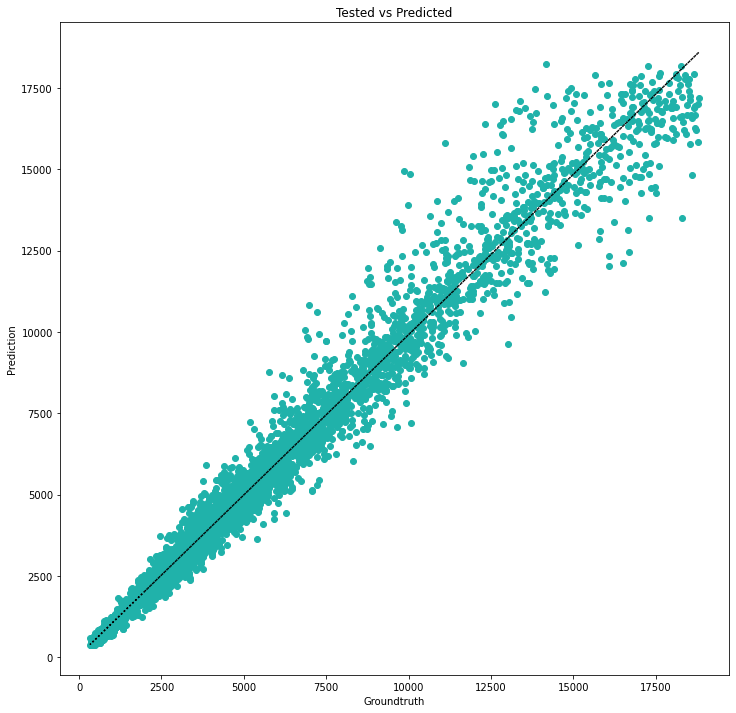

In [24]:
plt.figure(figsize=(12,12))
plt.scatter(x=y_test,y=y_pred, c="lightseagreen")
plt.plot(y_test,b+m*(y_test),':', c="black")
plt.title("Tested vs Predicted")
plt.xlabel("Groundtruth")
plt.ylabel("Prediction")
plt.savefig("output/ExtraTree.jpg")